In [1]:
!pip install --upgrade --force-reinstall tensorflow

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.9/60.9 kB 921.5 kB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.1/49.1 kB 525.8 kB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 615.4/615.4 MB 2.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 133.7/133.7 kB 11.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.5/57.5 kB 5.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.9/5.9 MB 109.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 95.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 67.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.5/24.5 MB 84.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 82.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 19.5/19.5 MB 97.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 71.9/71.9 kB 4.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 319.7/31

In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.utils import to_categorical
from tensorflow import keras
from tensorflow.keras import layers

In [2]:
(img_train, _), (_, _) = tf.keras.datasets.cifar100.load_data(
    label_mode='fine'
)

169001437/169001437 ━━━━━━━━━━━━━━━━━━━━ 13s 0us/step


In [3]:
img_train.shape

(50000, 32, 32, 3)

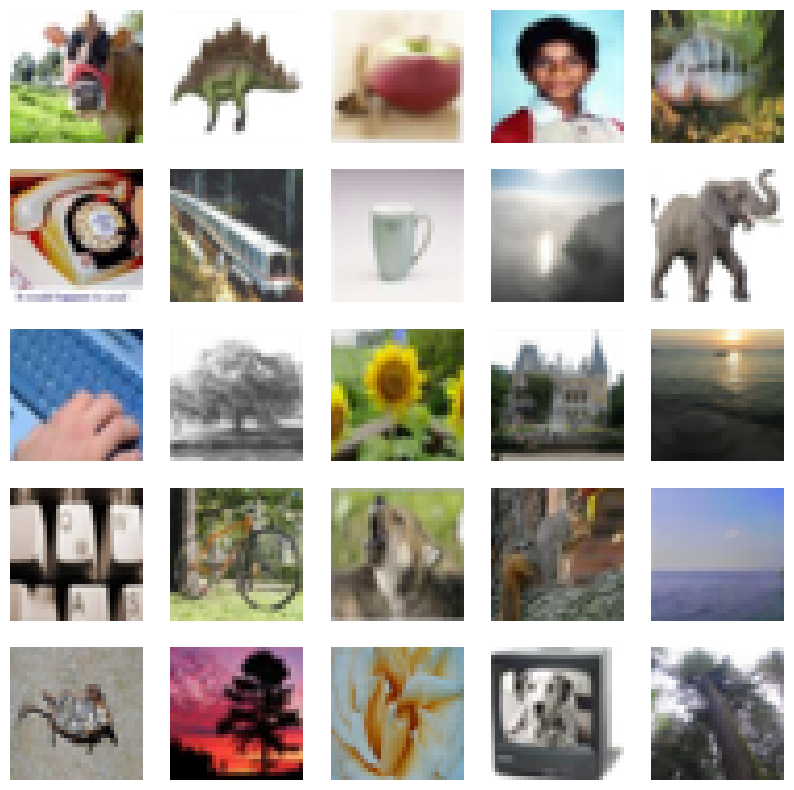

In [4]:
plt.figure(figsize=(10,10))
for i in range(25):
  plt.subplot(5, 5, i+1)
  plt.imshow(img_train[i])
  plt.axis("off")
plt.show()

In [5]:
img_train = img_train.reshape(img_train.shape[0], 32,32,3 ).astype('float32')
img_train = (img_train - 127.5) / 127.5

In [6]:
img_train.shape

(50000, 32, 32, 3)

In [7]:
BUFFER_SIZE = 50000
BATCH_SIZE = 128

In [8]:
img_train

array([[[[ 1.        ,  1.        ,  1.        ],
         [ 1.        ,  1.        ,  1.        ],
         [ 1.        ,  1.        ,  1.        ],
         ...,
         [ 0.5294118 ,  0.60784316,  0.5137255 ],
         [ 0.6627451 ,  0.75686276,  0.6       ],
         [ 0.42745098,  0.52156866,  0.30980393]],

        [[ 1.        ,  1.        ,  1.        ],
         [ 0.99215686,  0.99215686,  0.99215686],
         [ 0.99215686,  0.99215686,  0.99215686],
         ...,
         [ 0.33333334,  0.38039216,  0.1764706 ],
         [ 0.2627451 ,  0.31764707,  0.01960784],
         [ 0.14509805,  0.20784314, -0.11372549]],

        [[ 1.        ,  1.        ,  1.        ],
         [ 0.99215686,  0.99215686,  0.99215686],
         [ 1.        ,  1.        ,  1.        ],
         ...,
         [ 0.48235294,  0.56078434,  0.3254902 ],
         [ 0.3019608 ,  0.39607844,  0.01960784],
         [-0.05098039,  0.04313726, -0.31764707]],

        ...,

        [[ 0.16078432,  0.4509804 , -0

In [9]:
train_dataset = tf.data.Dataset.from_tensor_slices(img_train).shuffle(BUFFER_SIZE).batch(BATCH_SIZE)

In [10]:
LATENT_DIM = 100
WEIGHT_UNIT = keras.initializers.RandomNormal(mean= 0.0, stddev=0.02)

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


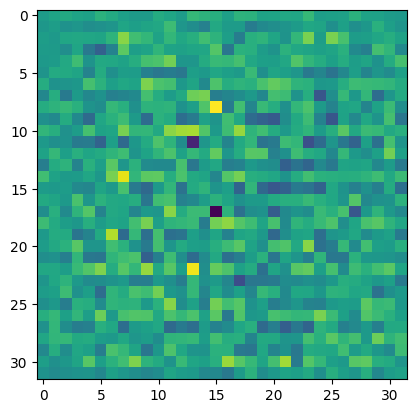

In [11]:
# prompt: build a generator

def make_generator_model():
    model = tf.keras.Sequential()
    model.add(layers.Dense(8*8*256, use_bias=False, input_shape=(LATENT_DIM,), kernel_initializer=WEIGHT_UNIT))
    model.add(layers.BatchNormalization())
    model.add(layers.LeakyReLU())

    model.add(layers.Reshape((8, 8, 256)))
    assert model.output_shape == (None, 8, 8, 256)  # Note: None is the batch size

    model.add(layers.Conv2DTranspose(128, (5, 5), strides=(1, 1), padding='same', use_bias=False, kernel_initializer=WEIGHT_UNIT))
    assert model.output_shape == (None, 8, 8, 128)
    model.add(layers.BatchNormalization())
    model.add(layers.LeakyReLU())

    model.add(layers.Conv2DTranspose(64, (5, 5), strides=(2, 2), padding='same', use_bias=False, kernel_initializer=WEIGHT_UNIT))
    assert model.output_shape == (None, 16, 16, 64)
    model.add(layers.BatchNormalization())
    model.add(layers.LeakyReLU())

    model.add(layers.Conv2DTranspose(3, (5, 5), strides=(2, 2), padding='same', use_bias=False, activation='tanh', kernel_initializer=WEIGHT_UNIT))
    assert model.output_shape == (None, 32, 32, 3)

    return model
generator = make_generator_model()

noise = tf.random.normal([1, LATENT_DIM])
generated_image = generator(noise, training=False)

plt.imshow(generated_image[0, :, :, 0])
plt.show()


In [12]:
# prompt: build a discriminators

def make_discriminator_model():
    model = tf.keras.Sequential()
    model.add(layers.Conv2D(64, (5, 5), strides=(2, 2), padding='same',
                                     input_shape=[32, 32, 3]))
    model.add(layers.LeakyReLU())
    model.add(layers.Dropout(0.3))

    model.add(layers.Conv2D(128, (5, 5), strides=(2, 2), padding='same'))
    model.add(layers.LeakyReLU())
    model.add(layers.Dropout(0.3))

    model.add(layers.Flatten())
    model.add(layers.Dense(1))

    return model
discriminator = make_discriminator_model()
decision = discriminator(generated_image)
decision


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


<tf.Tensor: shape=(1, 1), dtype=float32, numpy=array([[0.00085109]], dtype=float32)>

In [13]:
cross_entropy = keras.losses.BinaryCrossentropy()

def discriminator_loss(real_output, fake_output):
    real_loss = cross_entropy(tf.ones_like(real_output) * 0.9, real_output)  # Label smoothing
    fake_loss = cross_entropy(tf.zeros_like(fake_output), fake_output)
    return real_loss + fake_loss

def generator_loss(fake_output):
    return cross_entropy(tf.ones_like(fake_output), fake_output)

In [14]:

optimizer_gen = keras.optimizers.Adam(learning_rate=0.0002, beta_1=0.5)
optimizer_disc = keras.optimizers.Adam(learning_rate=0.0001, beta_1=0.5)  # Lower learning rate

In [15]:
# GAN Class
class GAN(keras.Model):
    def __init__(self, generator, discriminator):
        super(GAN, self).__init__()
        self.generator = generator
        self.discriminator = discriminator

    def compile(self, g_optimizer, d_optimizer, g_loss, d_loss):
        super(GAN, self).compile()
        self.g_optimizer = g_optimizer
        self.d_optimizer = d_optimizer
        self.g_loss = g_loss
        self.d_loss = d_loss

    def train_step(self, real_images):
        batch_size = tf.shape(real_images)[0]

        noise = tf.random.normal([batch_size, LATENT_DIM])
        with tf.GradientTape() as d_tape:
            generated_images = self.generator(noise, training=True)
            real_output = self.discriminator(real_images, training=True)
            fake_output = self.discriminator(generated_images, training=True)
            d_loss = self.d_loss(real_output, fake_output)

        d_gradients = d_tape.gradient(d_loss, self.discriminator.trainable_variables)
        self.d_optimizer.apply_gradients(zip(d_gradients, self.discriminator.trainable_variables))

        noise = tf.random.normal([batch_size, LATENT_DIM])
        with tf.GradientTape() as g_tape:
            generated_images = self.generator(noise, training=True)
            fake_output = self.discriminator(generated_images, training=True)
            g_loss = self.g_loss(fake_output)

        g_gradients = g_tape.gradient(g_loss, self.generator.trainable_variables)
        self.g_optimizer.apply_gradients(zip(g_gradients, self.generator.trainable_variables))

        return {"d_loss": d_loss, "g_loss": g_loss}

In [16]:
#Callback to visualize generated images
class ImageCallback(keras.callbacks.Callback):
    def __init__(self, num_images=16, latent_dim=100):
        self.num_images = num_images
        self.latent_dim = latent_dim
        self.seed = tf.random.normal([num_images, latent_dim])

    def on_epoch_end(self, epoch, logs=None):
        if epoch % 5 == 0:
            generated_images = self.model.generator(self.seed, training=False)
            generated_images = (generated_images * 127.5) + 127.5

            plt.figure(figsize=(10,10))
            for i in range(self.num_images):
                plt.subplot(4, 4, i+1)
                plt.imshow(generated_images[i].numpy().astype("uint8"))
                plt.axis("off")
            plt.show()

In [17]:
EPOCH = 100

In [18]:

gan = GAN(generator=generator, discriminator=discriminator)  # Changed 'generator' to 'genrator'
gan.compile(
    g_optimizer=optimizer_gen,
    d_optimizer=optimizer_disc,
    g_loss=generator_loss,
    d_loss=discriminator_loss
)

Epoch 1/100
391/391 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - d_loss: 6.7222 - g_loss: 4.3961

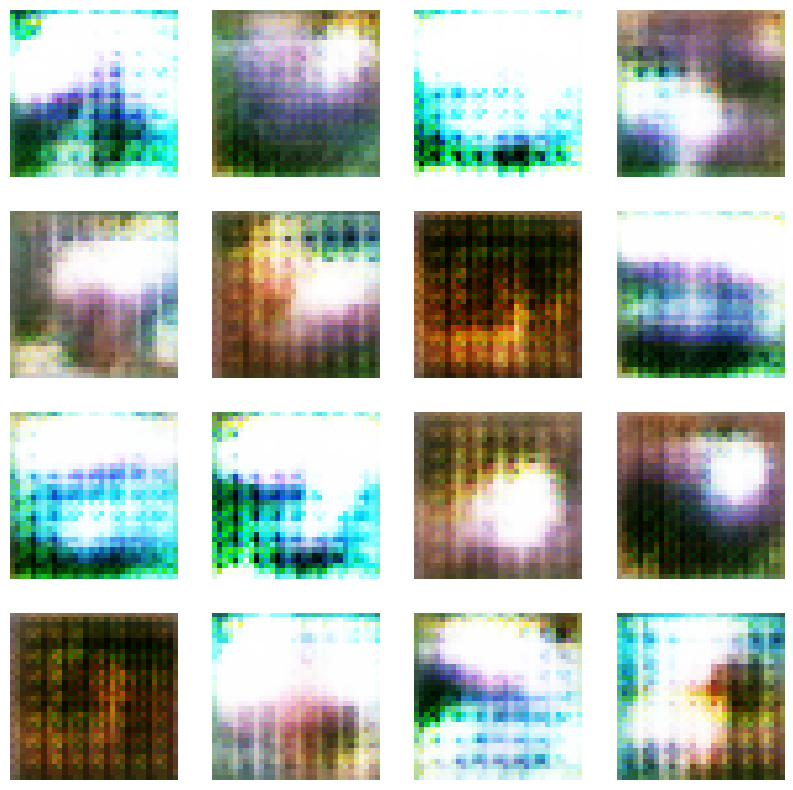

391/391 ━━━━━━━━━━━━━━━━━━━━ 12s 31ms/step - d_loss: 6.7086 - g_loss: 4.3916
Epoch 2/100
391/391 ━━━━━━━━━━━━━━━━━━━━ 20s 30ms/step - d_loss: 1.2455 - g_loss: 3.4953
Epoch 3/100
391/391 ━━━━━━━━━━━━━━━━━━━━ 12s 30ms/step - d_loss: 1.1941 - g_loss: 3.6619
Epoch 4/100
391/391 ━━━━━━━━━━━━━━━━━━━━ 12s 30ms/step - d_loss: 1.0392 - g_loss: 4.3062
Epoch 5/100
391/391 ━━━━━━━━━━━━━━━━━━━━ 20s 30ms/step - d_loss: 0.9390 - g_loss: 4.8937
Epoch 6/100
391/391 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - d_loss: 0.9025 - g_loss: 4.7432

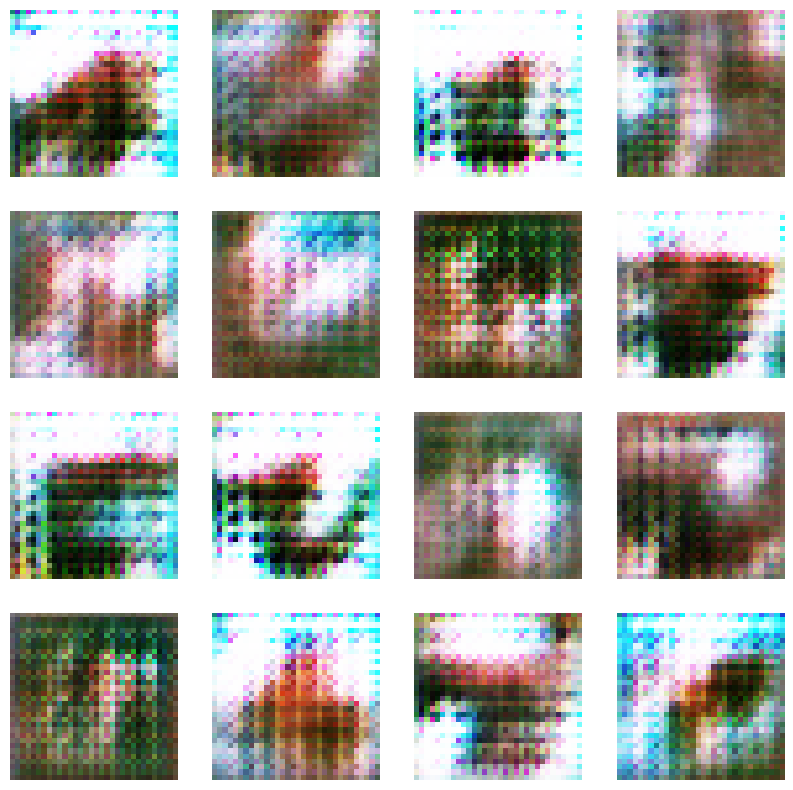

391/391 ━━━━━━━━━━━━━━━━━━━━ 12s 31ms/step - d_loss: 0.9023 - g_loss: 4.7457
Epoch 7/100
391/391 ━━━━━━━━━━━━━━━━━━━━ 20s 30ms/step - d_loss: 0.9085 - g_loss: 4.0788
Epoch 8/100
391/391 ━━━━━━━━━━━━━━━━━━━━ 20s 30ms/step - d_loss: 8.0679 - g_loss: 5.5288
Epoch 9/100
391/391 ━━━━━━━━━━━━━━━━━━━━ 12s 30ms/step - d_loss: 1.0754 - g_loss: 2.2614
Epoch 10/100
391/391 ━━━━━━━━━━━━━━━━━━━━ 20s 30ms/step - d_loss: 1.2703 - g_loss: 2.4723
Epoch 11/100
391/391 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - d_loss: 1.0372 - g_loss: 1.9497

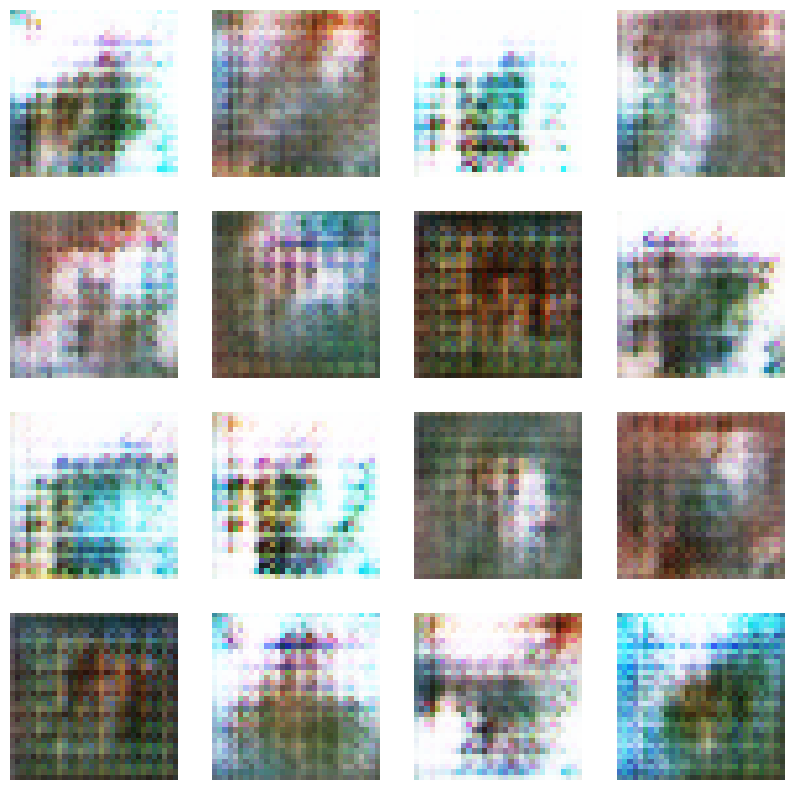

391/391 ━━━━━━━━━━━━━━━━━━━━ 21s 30ms/step - d_loss: 1.0374 - g_loss: 1.9498
Epoch 12/100
391/391 ━━━━━━━━━━━━━━━━━━━━ 12s 30ms/step - d_loss: 0.9504 - g_loss: 2.0335
Epoch 13/100
391/391 ━━━━━━━━━━━━━━━━━━━━ 20s 30ms/step - d_loss: 1.0975 - g_loss: 2.0791
Epoch 14/100
391/391 ━━━━━━━━━━━━━━━━━━━━ 20s 30ms/step - d_loss: 0.9505 - g_loss: 2.1948
Epoch 15/100
391/391 ━━━━━━━━━━━━━━━━━━━━ 21s 30ms/step - d_loss: 1.0441 - g_loss: 2.0721
Epoch 16/100
390/391 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - d_loss: 0.9848 - g_loss: 2.2574

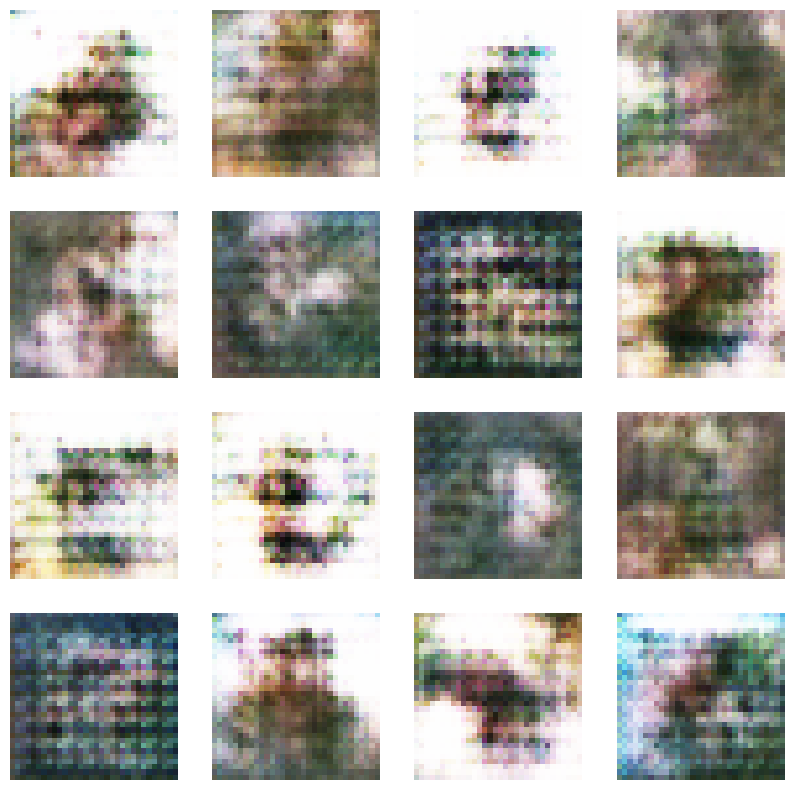

391/391 ━━━━━━━━━━━━━━━━━━━━ 21s 31ms/step - d_loss: 0.9850 - g_loss: 2.2534
Epoch 17/100
391/391 ━━━━━━━━━━━━━━━━━━━━ 12s 30ms/step - d_loss: 2.7130 - g_loss: 2.4402
Epoch 18/100
391/391 ━━━━━━━━━━━━━━━━━━━━ 20s 30ms/step - d_loss: 1.3730 - g_loss: 1.5963
Epoch 19/100
391/391 ━━━━━━━━━━━━━━━━━━━━ 12s 30ms/step - d_loss: 2.2524 - g_loss: 2.0868
Epoch 20/100
391/391 ━━━━━━━━━━━━━━━━━━━━ 20s 30ms/step - d_loss: 1.1533 - g_loss: 1.3764
Epoch 21/100
391/391 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - d_loss: 1.8742 - g_loss: 1.8430

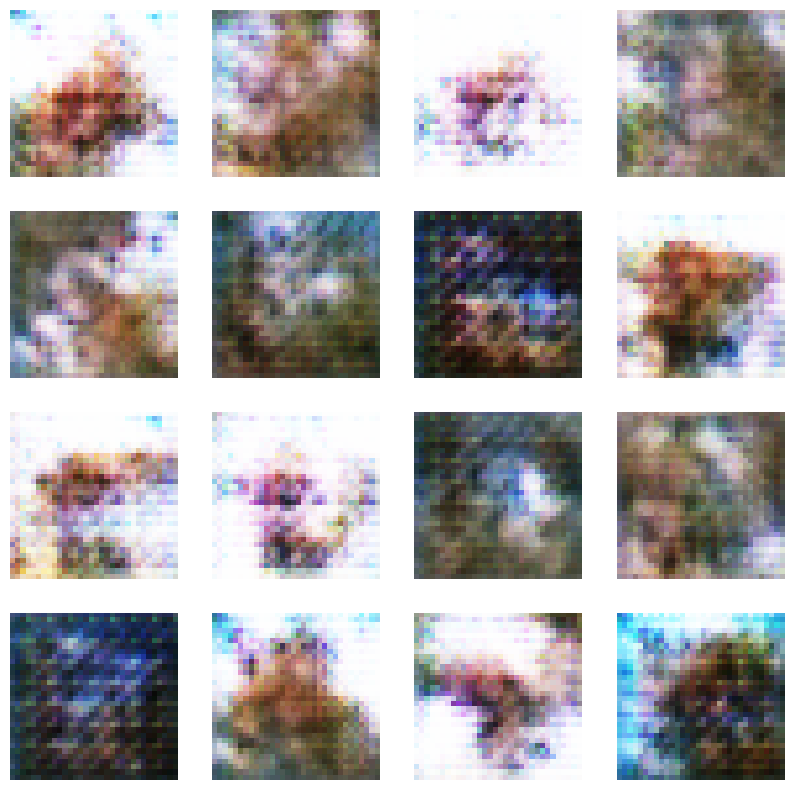

391/391 ━━━━━━━━━━━━━━━━━━━━ 12s 31ms/step - d_loss: 1.8726 - g_loss: 1.8418
Epoch 22/100
391/391 ━━━━━━━━━━━━━━━━━━━━ 12s 30ms/step - d_loss: 1.5913 - g_loss: 1.0391
Epoch 23/100
391/391 ━━━━━━━━━━━━━━━━━━━━ 20s 30ms/step - d_loss: 1.2126 - g_loss: 1.0593
Epoch 24/100
391/391 ━━━━━━━━━━━━━━━━━━━━ 12s 30ms/step - d_loss: 1.1603 - g_loss: 1.0604
Epoch 25/100
391/391 ━━━━━━━━━━━━━━━━━━━━ 20s 30ms/step - d_loss: 1.1563 - g_loss: 1.1078
Epoch 26/100
391/391 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - d_loss: 1.2030 - g_loss: 1.0808

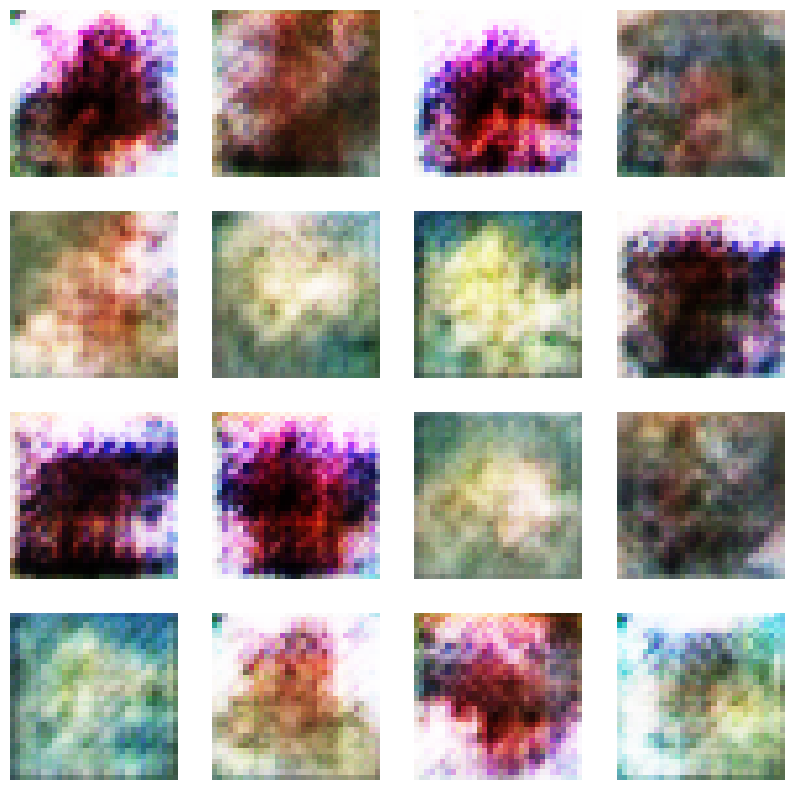

391/391 ━━━━━━━━━━━━━━━━━━━━ 12s 31ms/step - d_loss: 1.2027 - g_loss: 1.0805
Epoch 27/100
391/391 ━━━━━━━━━━━━━━━━━━━━ 20s 30ms/step - d_loss: 1.7361 - g_loss: 1.3524
Epoch 28/100
391/391 ━━━━━━━━━━━━━━━━━━━━ 20s 30ms/step - d_loss: 1.2240 - g_loss: 1.0564
Epoch 29/100
391/391 ━━━━━━━━━━━━━━━━━━━━ 12s 30ms/step - d_loss: 2.2279 - g_loss: 1.3239
Epoch 30/100
391/391 ━━━━━━━━━━━━━━━━━━━━ 12s 30ms/step - d_loss: 1.2976 - g_loss: 0.9514
Epoch 31/100
390/391 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - d_loss: 1.2504 - g_loss: 1.0118

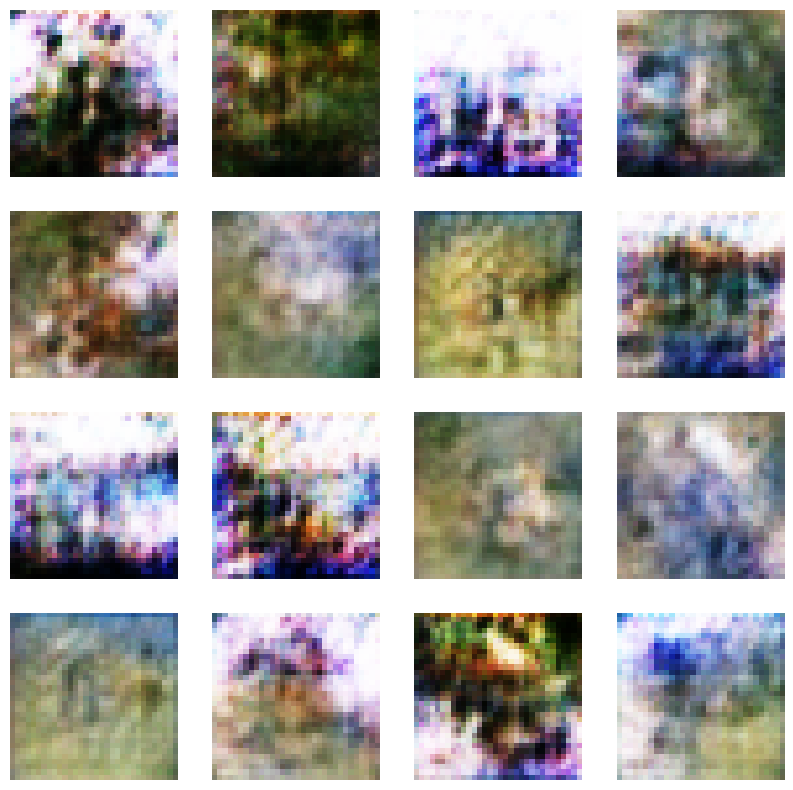

391/391 ━━━━━━━━━━━━━━━━━━━━ 21s 31ms/step - d_loss: 1.2503 - g_loss: 1.0119
Epoch 32/100
391/391 ━━━━━━━━━━━━━━━━━━━━ 12s 30ms/step - d_loss: 1.2360 - g_loss: 1.0248
Epoch 33/100
391/391 ━━━━━━━━━━━━━━━━━━━━ 21s 30ms/step - d_loss: 1.2294 - g_loss: 1.0173
Epoch 34/100
391/391 ━━━━━━━━━━━━━━━━━━━━ 21s 30ms/step - d_loss: 1.8274 - g_loss: 1.3405
Epoch 35/100
391/391 ━━━━━━━━━━━━━━━━━━━━ 12s 30ms/step - d_loss: 1.8605 - g_loss: 1.1538
Epoch 36/100
391/391 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - d_loss: 2.3210 - g_loss: 1.2306

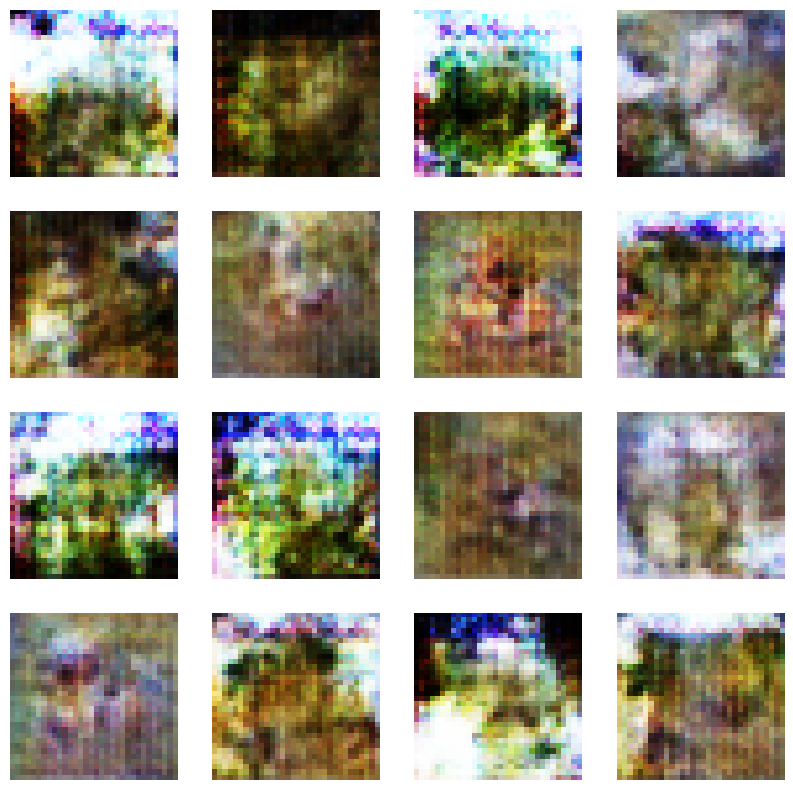

391/391 ━━━━━━━━━━━━━━━━━━━━ 12s 31ms/step - d_loss: 2.3186 - g_loss: 1.2296
Epoch 37/100
391/391 ━━━━━━━━━━━━━━━━━━━━ 12s 30ms/step - d_loss: 1.3439 - g_loss: 0.8797
Epoch 38/100
391/391 ━━━━━━━━━━━━━━━━━━━━ 12s 30ms/step - d_loss: 1.3300 - g_loss: 0.8856
Epoch 39/100
391/391 ━━━━━━━━━━━━━━━━━━━━ 20s 30ms/step - d_loss: 1.3145 - g_loss: 0.8943
Epoch 40/100
391/391 ━━━━━━━━━━━━━━━━━━━━ 12s 30ms/step - d_loss: 1.2928 - g_loss: 0.9241
Epoch 41/100
391/391 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - d_loss: 1.2336 - g_loss: 1.0501

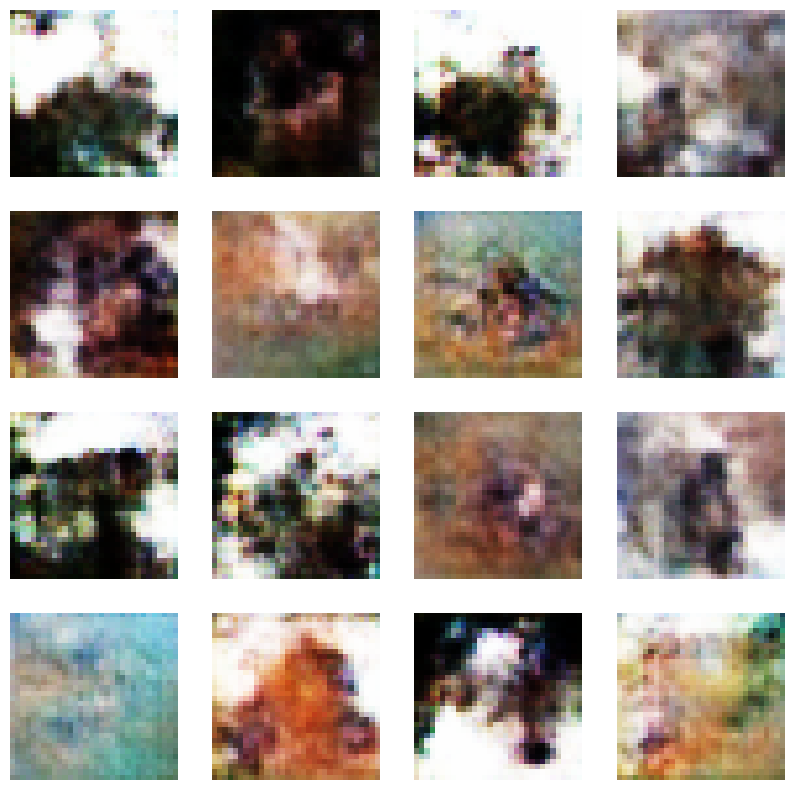

391/391 ━━━━━━━━━━━━━━━━━━━━ 12s 31ms/step - d_loss: 1.2333 - g_loss: 1.0502
Epoch 42/100
391/391 ━━━━━━━━━━━━━━━━━━━━ 12s 30ms/step - d_loss: 1.9124 - g_loss: 1.8497
Epoch 43/100
391/391 ━━━━━━━━━━━━━━━━━━━━ 20s 30ms/step - d_loss: 1.2026 - g_loss: 1.3998
Epoch 44/100
391/391 ━━━━━━━━━━━━━━━━━━━━ 21s 30ms/step - d_loss: 1.7591 - g_loss: 1.6593
Epoch 45/100
391/391 ━━━━━━━━━━━━━━━━━━━━ 20s 30ms/step - d_loss: 5.5530 - g_loss: 1.0461
Epoch 46/100
391/391 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - d_loss: 1.5659 - g_loss: 0.8149

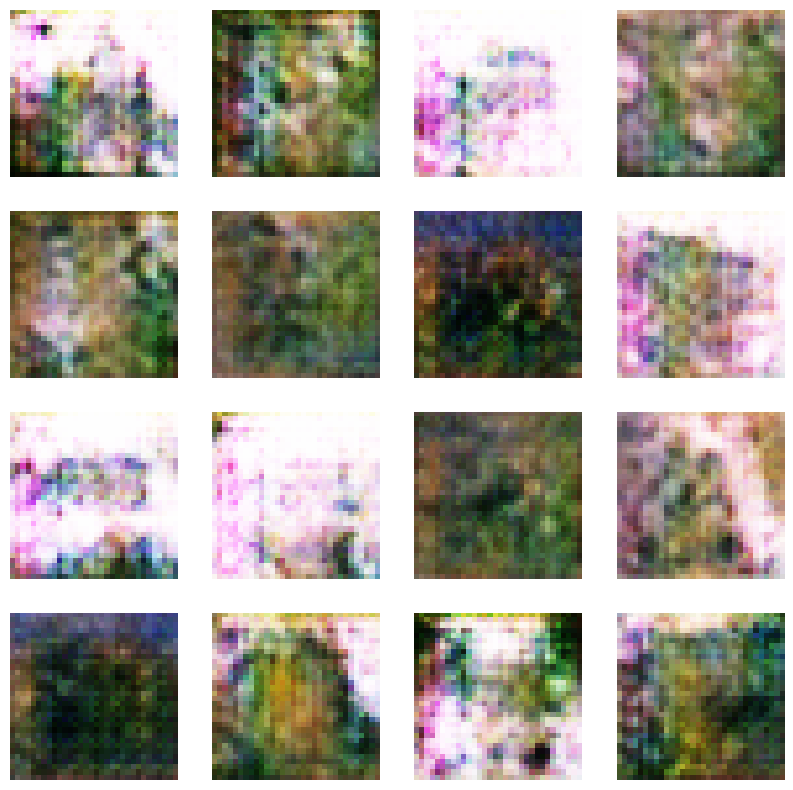

391/391 ━━━━━━━━━━━━━━━━━━━━ 12s 31ms/step - d_loss: 1.5656 - g_loss: 0.8151
Epoch 47/100
391/391 ━━━━━━━━━━━━━━━━━━━━ 12s 30ms/step - d_loss: 1.4013 - g_loss: 0.8569
Epoch 48/100
391/391 ━━━━━━━━━━━━━━━━━━━━ 20s 30ms/step - d_loss: 1.3613 - g_loss: 0.8664
Epoch 49/100
391/391 ━━━━━━━━━━━━━━━━━━━━ 21s 30ms/step - d_loss: 1.3717 - g_loss: 0.8434
Epoch 50/100
391/391 ━━━━━━━━━━━━━━━━━━━━ 12s 30ms/step - d_loss: 1.3626 - g_loss: 0.8622
Epoch 51/100
389/391 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - d_loss: 1.3633 - g_loss: 0.8586

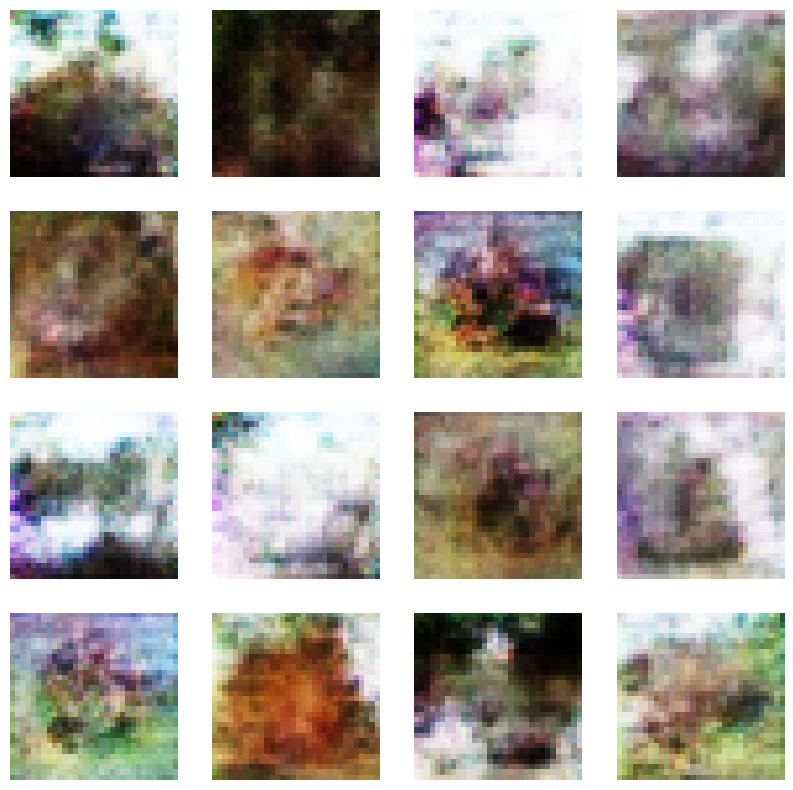

391/391 ━━━━━━━━━━━━━━━━━━━━ 20s 30ms/step - d_loss: 1.3634 - g_loss: 0.8584
Epoch 52/100
391/391 ━━━━━━━━━━━━━━━━━━━━ 20s 30ms/step - d_loss: 1.3224 - g_loss: 0.8990
Epoch 53/100
391/391 ━━━━━━━━━━━━━━━━━━━━ 21s 30ms/step - d_loss: 1.5157 - g_loss: 0.9960
Epoch 54/100
391/391 ━━━━━━━━━━━━━━━━━━━━ 12s 30ms/step - d_loss: 1.3066 - g_loss: 0.9095
Epoch 55/100
391/391 ━━━━━━━━━━━━━━━━━━━━ 12s 30ms/step - d_loss: 1.3304 - g_loss: 0.9061
Epoch 56/100
391/391 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - d_loss: 1.3289 - g_loss: 0.9187

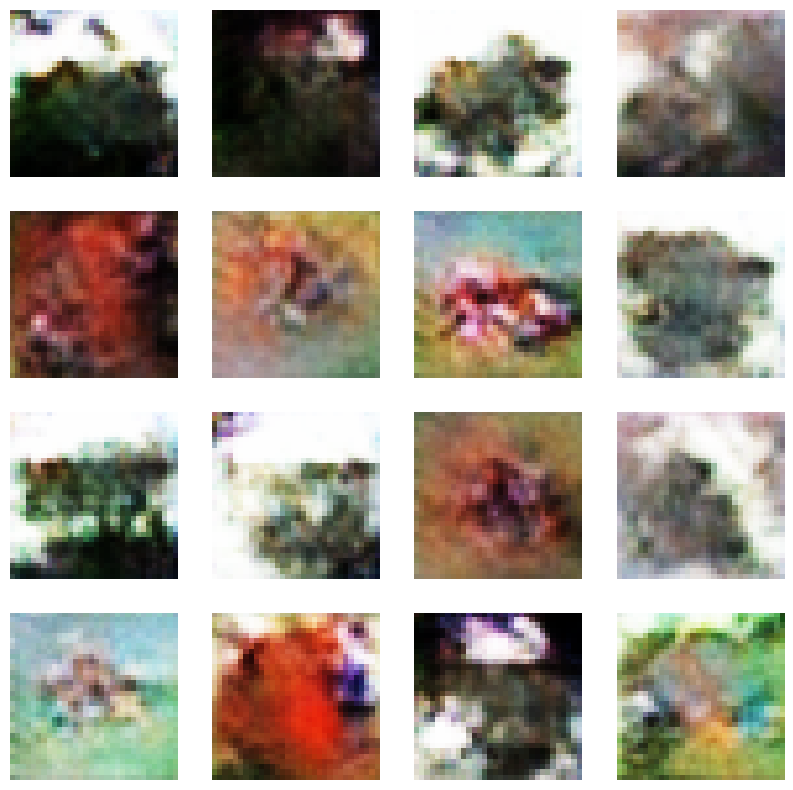

391/391 ━━━━━━━━━━━━━━━━━━━━ 21s 31ms/step - d_loss: 1.3288 - g_loss: 0.9186
Epoch 57/100
391/391 ━━━━━━━━━━━━━━━━━━━━ 12s 30ms/step - d_loss: 1.3363 - g_loss: 0.8955
Epoch 58/100
391/391 ━━━━━━━━━━━━━━━━━━━━ 21s 30ms/step - d_loss: 1.3512 - g_loss: 0.8854
Epoch 59/100
391/391 ━━━━━━━━━━━━━━━━━━━━ 21s 30ms/step - d_loss: 1.3582 - g_loss: 0.8739
Epoch 60/100
391/391 ━━━━━━━━━━━━━━━━━━━━ 12s 30ms/step - d_loss: 1.3546 - g_loss: 0.8714
Epoch 61/100
391/391 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - d_loss: 1.3822 - g_loss: 0.8825

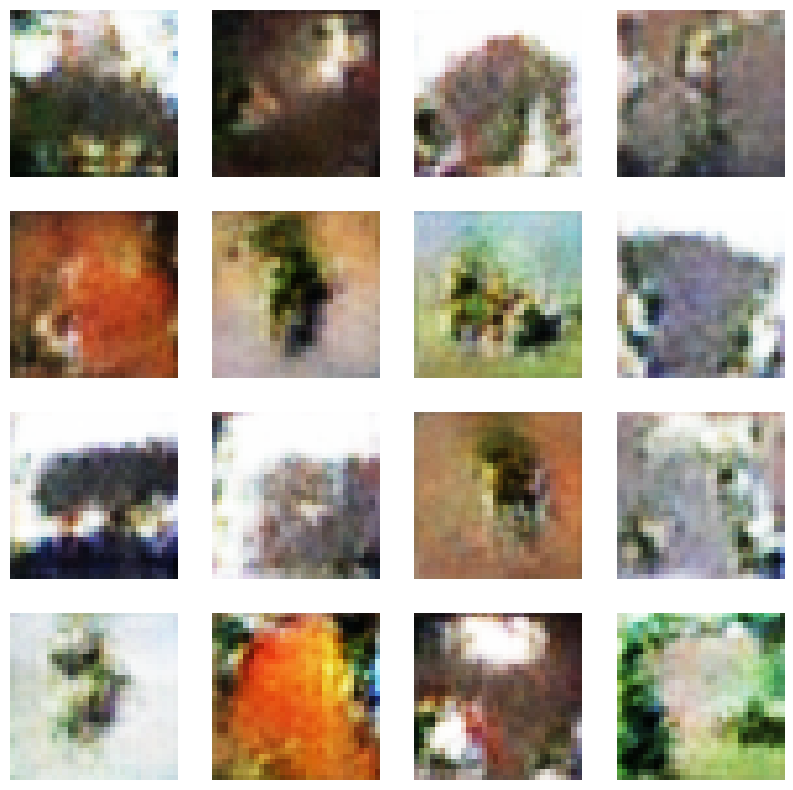

391/391 ━━━━━━━━━━━━━━━━━━━━ 12s 31ms/step - d_loss: 1.3822 - g_loss: 0.8825
Epoch 62/100
391/391 ━━━━━━━━━━━━━━━━━━━━ 20s 31ms/step - d_loss: 1.3601 - g_loss: 0.8645
Epoch 63/100
391/391 ━━━━━━━━━━━━━━━━━━━━ 12s 30ms/step - d_loss: 1.3557 - g_loss: 0.8685
Epoch 64/100
391/391 ━━━━━━━━━━━━━━━━━━━━ 12s 30ms/step - d_loss: 1.3530 - g_loss: 0.8725
Epoch 65/100
391/391 ━━━━━━━━━━━━━━━━━━━━ 20s 30ms/step - d_loss: 1.3509 - g_loss: 0.8947
Epoch 66/100
390/391 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - d_loss: 1.3398 - g_loss: 0.9052

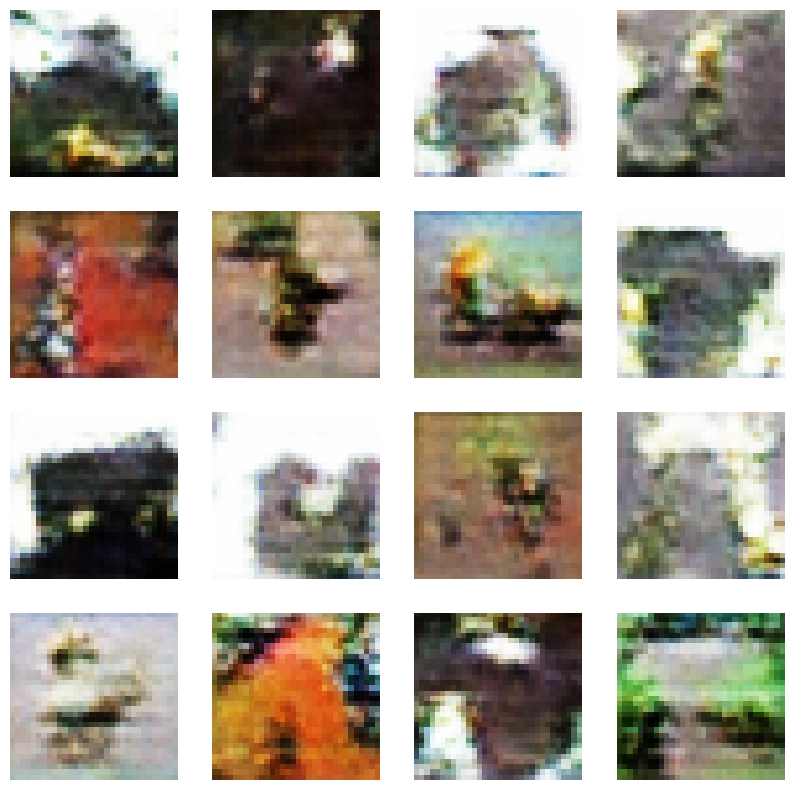

391/391 ━━━━━━━━━━━━━━━━━━━━ 21s 31ms/step - d_loss: 1.3400 - g_loss: 0.9050
Epoch 67/100
391/391 ━━━━━━━━━━━━━━━━━━━━ 20s 30ms/step - d_loss: 1.3244 - g_loss: 0.9221
Epoch 68/100
391/391 ━━━━━━━━━━━━━━━━━━━━ 12s 30ms/step - d_loss: 4.2018 - g_loss: 1.6187
Epoch 69/100
391/391 ━━━━━━━━━━━━━━━━━━━━ 12s 30ms/step - d_loss: 1.3268 - g_loss: 0.8838
Epoch 70/100
391/391 ━━━━━━━━━━━━━━━━━━━━ 12s 30ms/step - d_loss: 1.3503 - g_loss: 0.8549
Epoch 71/100
391/391 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - d_loss: 1.3308 - g_loss: 0.8906

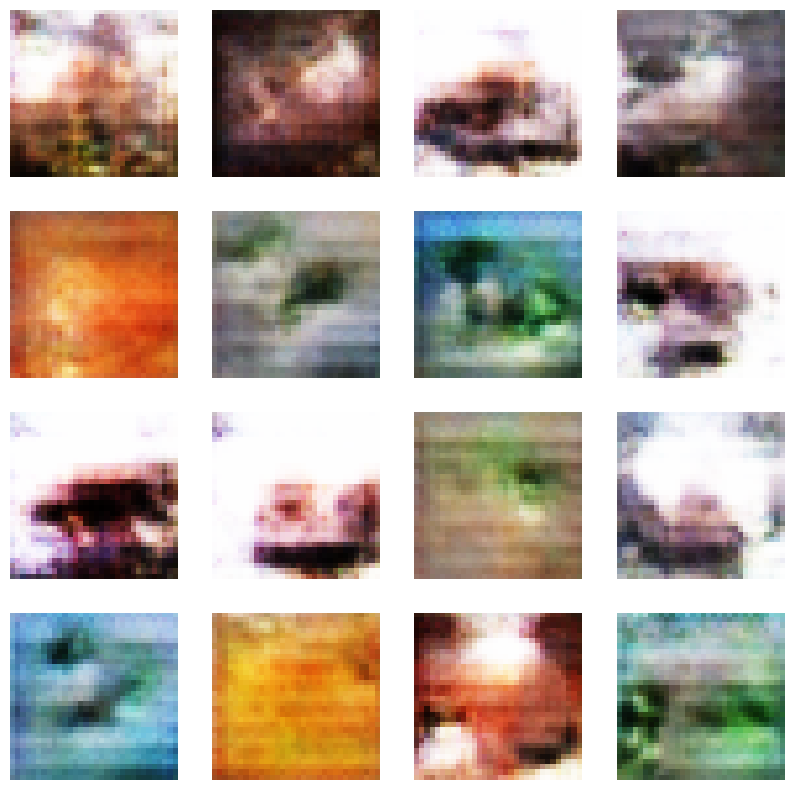

391/391 ━━━━━━━━━━━━━━━━━━━━ 21s 30ms/step - d_loss: 1.3309 - g_loss: 0.8906
Epoch 72/100
391/391 ━━━━━━━━━━━━━━━━━━━━ 12s 30ms/step - d_loss: 1.3208 - g_loss: 0.8851
Epoch 73/100
391/391 ━━━━━━━━━━━━━━━━━━━━ 21s 30ms/step - d_loss: 1.2958 - g_loss: 0.9320
Epoch 74/100
391/391 ━━━━━━━━━━━━━━━━━━━━ 12s 30ms/step - d_loss: 1.3031 - g_loss: 0.8904
Epoch 75/100
391/391 ━━━━━━━━━━━━━━━━━━━━ 20s 30ms/step - d_loss: 1.3139 - g_loss: 0.9089
Epoch 76/100
391/391 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - d_loss: 1.3207 - g_loss: 0.8790

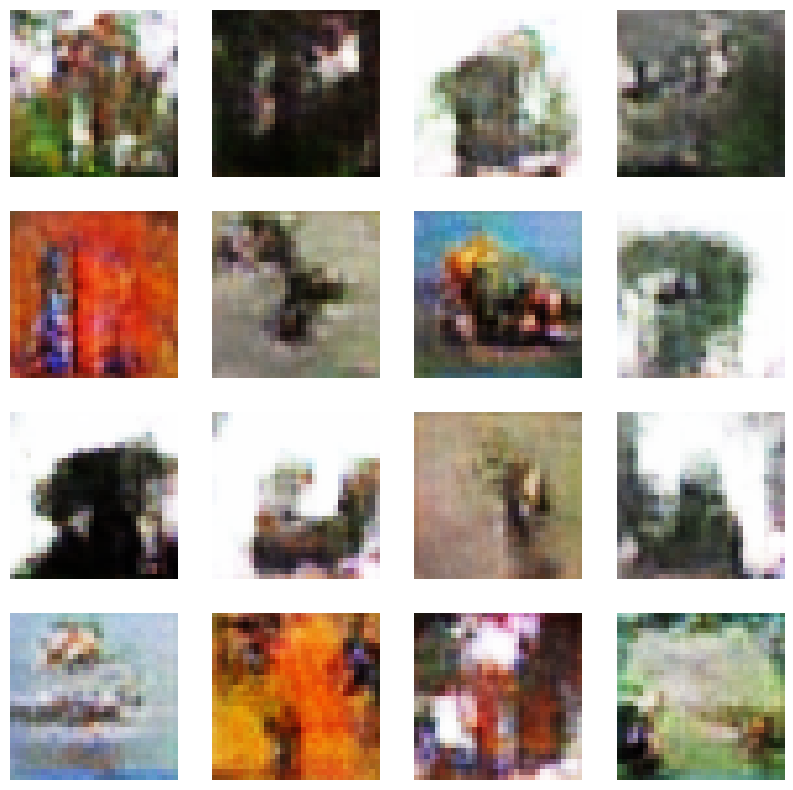

391/391 ━━━━━━━━━━━━━━━━━━━━ 12s 31ms/step - d_loss: 1.3207 - g_loss: 0.8790
Epoch 77/100
391/391 ━━━━━━━━━━━━━━━━━━━━ 12s 30ms/step - d_loss: 1.3245 - g_loss: 0.9009
Epoch 78/100
391/391 ━━━━━━━━━━━━━━━━━━━━ 12s 30ms/step - d_loss: 1.3291 - g_loss: 0.9055
Epoch 79/100
391/391 ━━━━━━━━━━━━━━━━━━━━ 12s 30ms/step - d_loss: 1.3295 - g_loss: 0.9020
Epoch 80/100
391/391 ━━━━━━━━━━━━━━━━━━━━ 12s 30ms/step - d_loss: 1.3348 - g_loss: 0.9055
Epoch 81/100
391/391 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - d_loss: 1.3471 - g_loss: 0.8941

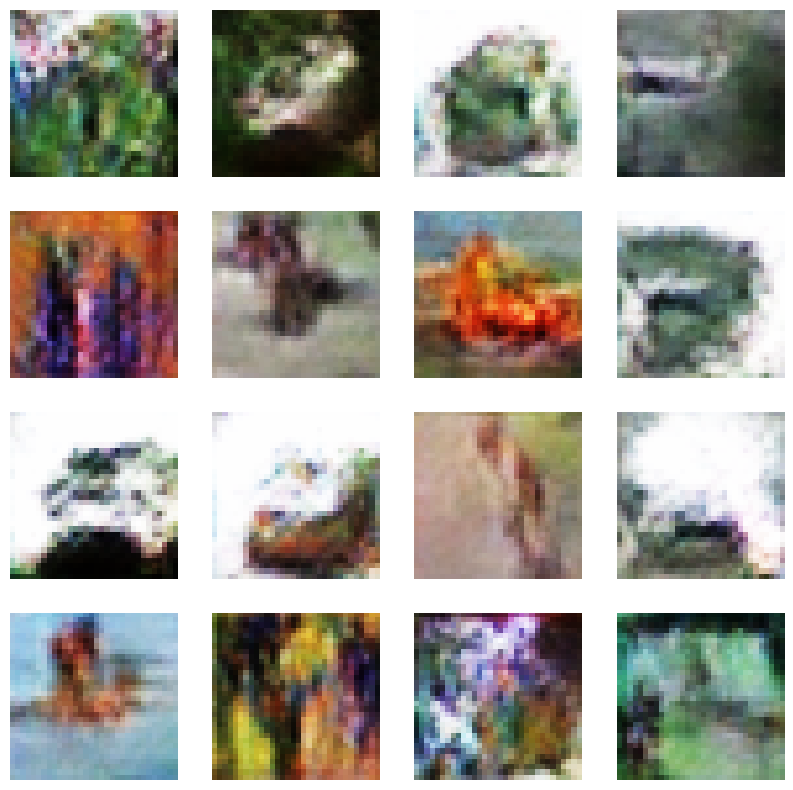

391/391 ━━━━━━━━━━━━━━━━━━━━ 12s 31ms/step - d_loss: 1.3470 - g_loss: 0.8941
Epoch 82/100
391/391 ━━━━━━━━━━━━━━━━━━━━ 12s 29ms/step - d_loss: 5.3913 - g_loss: 1.1801
Epoch 83/100
391/391 ━━━━━━━━━━━━━━━━━━━━ 20s 30ms/step - d_loss: 3.6959 - g_loss: 2.3426
Epoch 84/100
391/391 ━━━━━━━━━━━━━━━━━━━━ 12s 30ms/step - d_loss: 1.4563 - g_loss: 0.7885
Epoch 85/100
391/391 ━━━━━━━━━━━━━━━━━━━━ 12s 30ms/step - d_loss: 1.4464 - g_loss: 0.7694
Epoch 86/100
391/391 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - d_loss: 1.3947 - g_loss: 0.8053

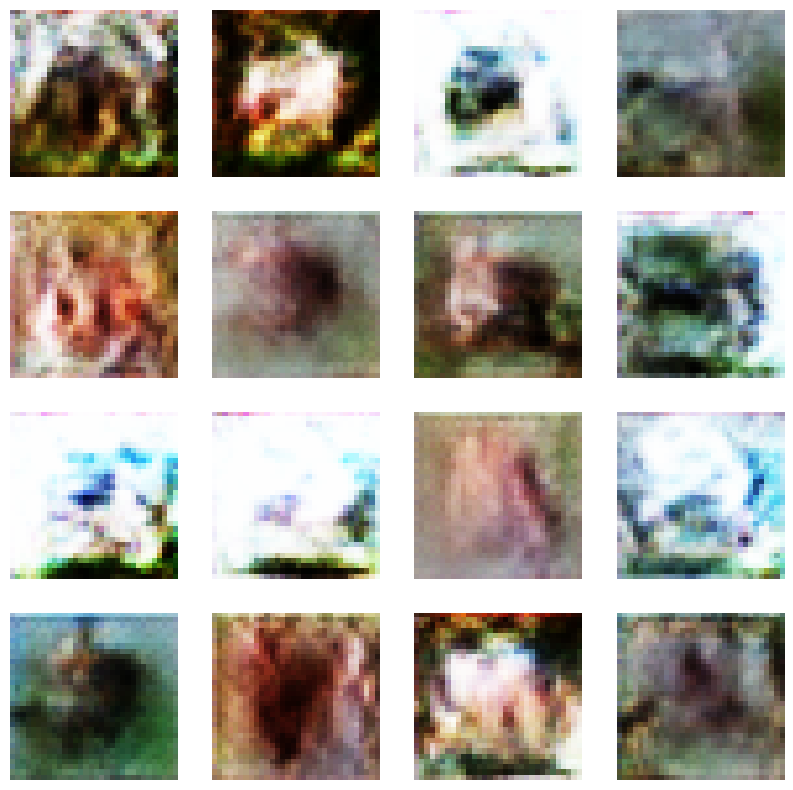

391/391 ━━━━━━━━━━━━━━━━━━━━ 21s 31ms/step - d_loss: 1.3946 - g_loss: 0.8053
Epoch 87/100
391/391 ━━━━━━━━━━━━━━━━━━━━ 20s 30ms/step - d_loss: 1.3791 - g_loss: 0.8294
Epoch 88/100
391/391 ━━━━━━━━━━━━━━━━━━━━ 21s 30ms/step - d_loss: 1.3561 - g_loss: 0.8629
Epoch 89/100
391/391 ━━━━━━━━━━━━━━━━━━━━ 12s 30ms/step - d_loss: 1.3708 - g_loss: 0.8245
Epoch 90/100
391/391 ━━━━━━━━━━━━━━━━━━━━ 20s 30ms/step - d_loss: 1.3781 - g_loss: 0.8229
Epoch 91/100
391/391 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - d_loss: 1.3903 - g_loss: 0.8087

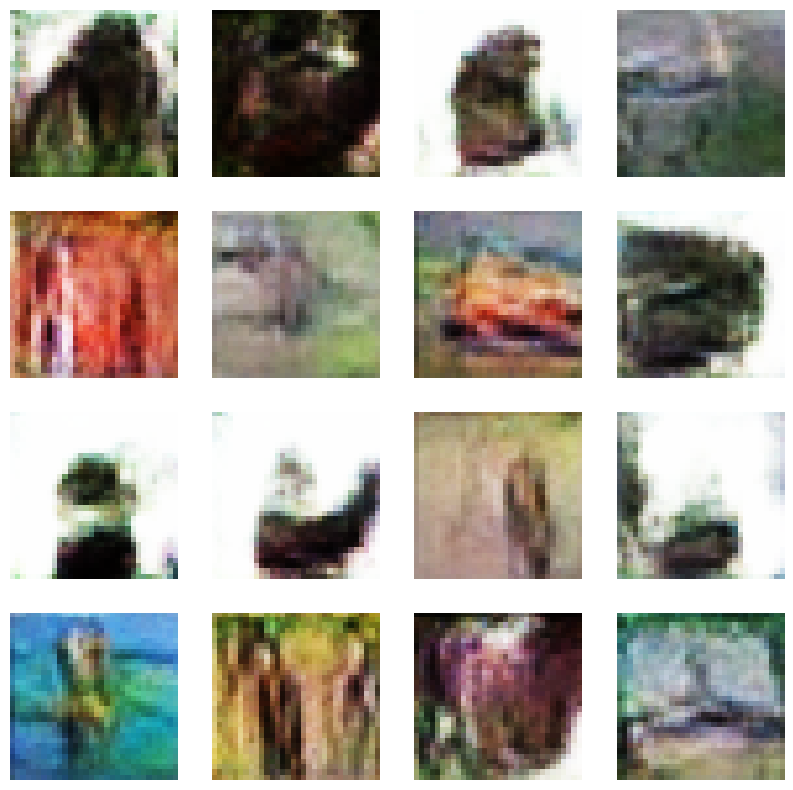

391/391 ━━━━━━━━━━━━━━━━━━━━ 12s 31ms/step - d_loss: 1.3904 - g_loss: 0.8087
Epoch 92/100
391/391 ━━━━━━━━━━━━━━━━━━━━ 12s 30ms/step - d_loss: 1.4002 - g_loss: 0.7990
Epoch 93/100
391/391 ━━━━━━━━━━━━━━━━━━━━ 20s 30ms/step - d_loss: 1.4043 - g_loss: 0.7955
Epoch 94/100
391/391 ━━━━━━━━━━━━━━━━━━━━ 21s 30ms/step - d_loss: 1.3996 - g_loss: 0.8000
Epoch 95/100
391/391 ━━━━━━━━━━━━━━━━━━━━ 12s 30ms/step - d_loss: 1.3947 - g_loss: 0.8075
Epoch 96/100
391/391 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - d_loss: 1.3912 - g_loss: 0.8116

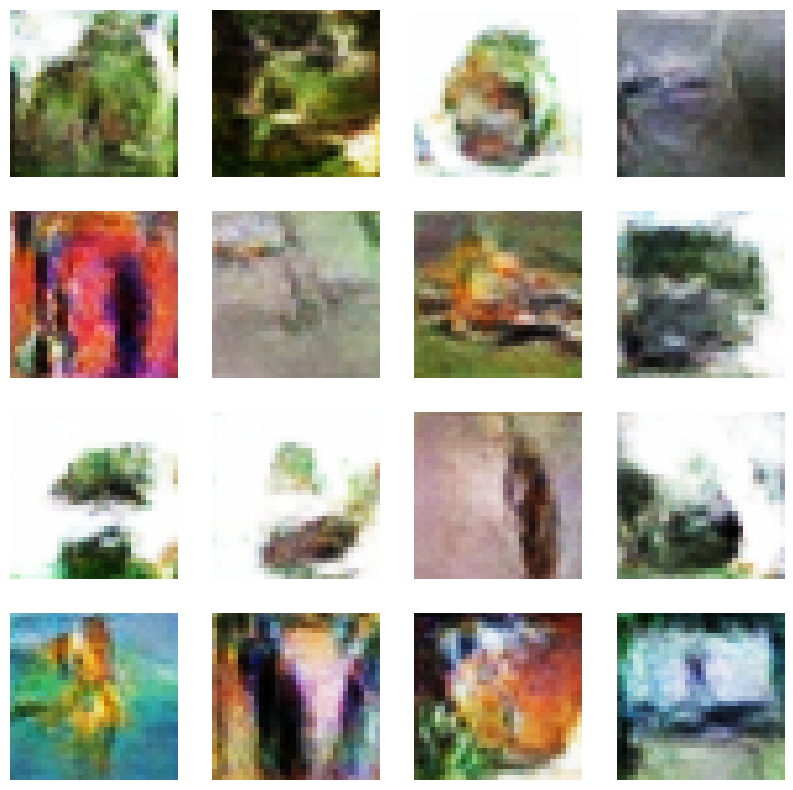

391/391 ━━━━━━━━━━━━━━━━━━━━ 21s 31ms/step - d_loss: 1.3913 - g_loss: 0.8116
Epoch 97/100
391/391 ━━━━━━━━━━━━━━━━━━━━ 12s 30ms/step - d_loss: 1.3872 - g_loss: 0.8148
Epoch 98/100
391/391 ━━━━━━━━━━━━━━━━━━━━ 20s 30ms/step - d_loss: 1.3835 - g_loss: 0.8212
Epoch 99/100
391/391 ━━━━━━━━━━━━━━━━━━━━ 21s 30ms/step - d_loss: 1.3798 - g_loss: 0.8244
Epoch 100/100
391/391 ━━━━━━━━━━━━━━━━━━━━ 12s 30ms/step - d_loss: 1.3768 - g_loss: 0.8282


In [24]:
history = gan.fit(train_dataset, epochs=EPOCH, callbacks=[ImageCallback()])

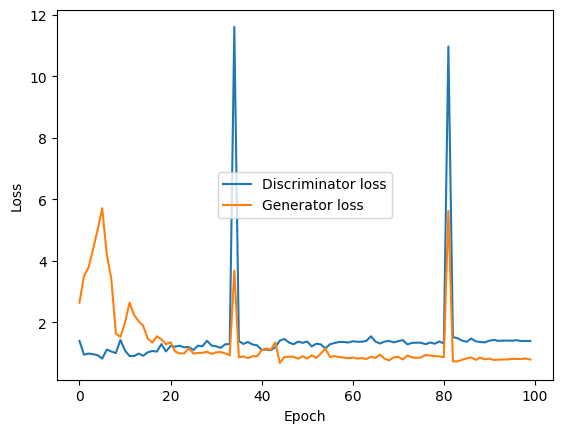

In [25]:
plt.plot(history.history['d_loss'], label='Discriminator loss')
plt.plot(history.history['g_loss'], label='Generator loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [26]:
# Test the generator
noise = tf.random.normal([25, LATENT_DIM])
generated_images = generator(noise)
generated_images = (generated_images * 127.5) + 127.5

<module 'matplotlib.pyplot' from '/usr/local/lib/python3.11/dist-packages/matplotlib/pyplot.py'>

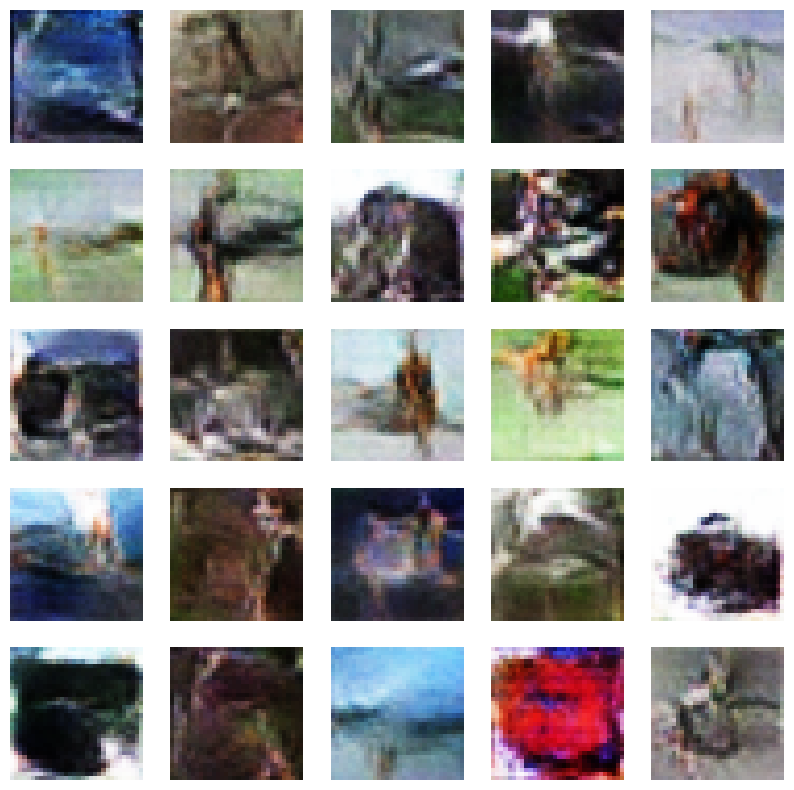

In [27]:
plt.figure(figsize=(10,10))
for i in range(25):
  plt.subplot(5, 5, i+1)
  plt.imshow(generated_images[i].numpy().astype("uint8"), cmap="gray")
  plt.axis("off")
plt

In [28]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [31]:
generator.save("/content/drive/My Drive/CIFAR100DATASET.h5")